# Differential Elastic Scattering Cross Sections for Silicon and Germanium Isotopes

## Objective

The aim of this work is to compare the new neutron-electron magnetic process to other neutron-induced processes for rare-event background studies. The neutron-nuclear process is the competing process in the low energy regime. Recoil spectra from this process depend on the differential cross section of the neutron-nuclear scattering. Here we explain our processes for obtaining our estimates for these cross sections.

In this notebook, we extract and compare elastic scattering data for all stable isotopes of **Silicon (Si)** and **Germanium (Ge)**. We use the `endfel` module to:
- Read total elastic cross sections from `.txt` files,
- Parse Legendre polynomial coefficients from `.endf` files,
- Construct differential cross sections at given energies, and
- Visualize the results for all isotopes of interest.

The isotopes included are:
- **Silicon**: 28-Si, 29-Si, 30-Si  
- **Germanium**: 70-Ge, 72-Ge, 73-Ge, 74-Ge, 76-Ge

## Libraries and Style Files

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np

ENDF6 Files
-----------

The Evaluated Nuclear Database File (ENDF) has been the format for compiling and transmitting the nuclear data for many years. The [[ENDF/B-VIII.0][ENDF/B-VIII]] (2018) is the most recent evaluation we have copied these files in the directory `xn_data/` which includes official ENDF6 files with the extension `.endf` and files with the extension `.txt` that include the total elastic cross section data.

The differential Center-of-Mass (CoM) cross section data is encoded either in tabulated form (a number in the file for each angular point) or in terms of Legendre coefficients. The cross sections that we have used are in terms of the Legendre coefficients according to the equation below. The function $\sigma(\mu,E)$ is the angular cross section in $\mu \equiv \cos{\theta}$ for each incoming neutron energy $E$. 

\begin{equation}
f(\mu,E) = \frac{2\pi}{\sigma_s(E)} \sigma(\mu,E) = \sum_{l=0}^{N_l} \frac{2l+1}{2}a_l(E)P_l(\mu)
\end{equation}


[ENDF/B-VIII]: https://www.nndc.bnl.gov/endf-b8.0/download.html "ENDF/B-VIII.0 Documentation"

Total Elastic Cross Section Data
--------------------------------

The total cross elastic section as a function of neutron energy is needed to find the differential CoM cross sections, as can be seen by the equation above. The evaluated total cross section is included in the `.endf` files, but in the awkward Reich-Moore parameterization. Instead, we downloaded tabular data for the total cross section from the web interface [[Elastic XN][Elastic XN]]. For example, to get the $^{28}$Si elastic cross section we went to the site and filled out the form as follows, selecting only ENDF VIII.0 data.

![ENDF Online](figures/ENDF-VIII.0-Online.png "ENDF Online Data Plotter")

Then, we retrieved the data and did a "quick plot" which shows the total cross section as below.

![ENDF Online](figures/ENDF-VIII.0-28Si-Elastic.png "28-Si Elastic Cross Section from Online Plotter")

To save the data to our repository we clicked on the "plotted data" link on the right side, then saved the resulting page as a `.txt` file into our top-level directory `xn_data/`. This process was repeated for each of the eight isotopes to ensure full coverage of the materials used in our analysis.

[Elastic XN]: https://www.nndc.bnl.gov/endf/ "cross sections online"

Plotting the Elastic Cross Section with Our Library
---------------------------------------------------

Our library is called `ENDF6el.py` and loads the data from the directory `xn_data/`. Below we open the library and plot the neutron elastic cross sections for all three naturally occurring Silicon isotopes ($^{28}$Si, $^{29}$Si, $^{30}$Si) and all five naturally occurring Germanium isotopes ($^{70}$Ge, $^{72}$Ge, $^{73}$Ge, $^{74}$Ge, $^{76}$Ge).

The function fetch_elastic reads the .txt files downloaded from the ENDF/B-VIII.0 interface and returns an interpolated function of cross section vs. neutron energy for each isotope.

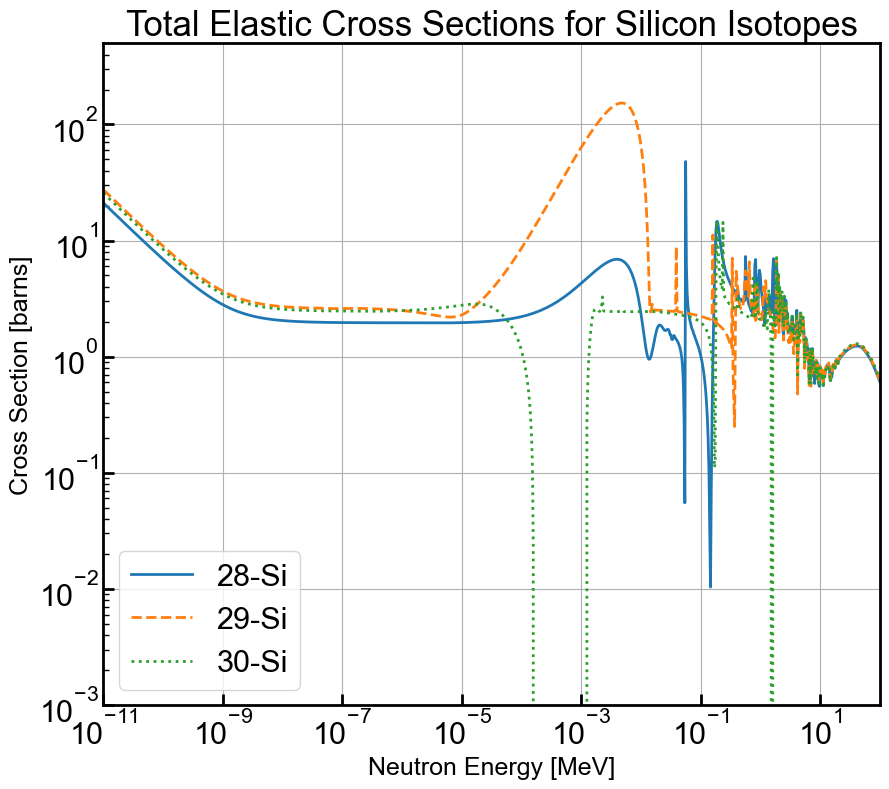

&nbsp;

&nbsp;



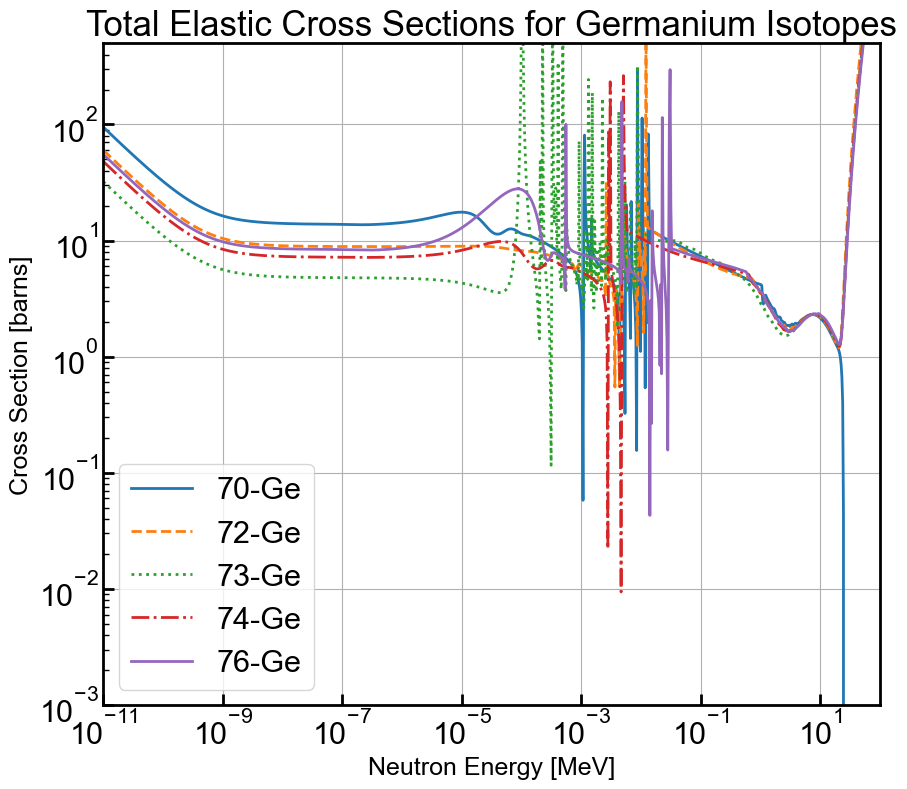

In [2]:
import ENDF6el as endfel

En = np.geomspace(1e-11, 100, 1000)

# Load total elastic cross sections for all 3 Silicon isotopes
f_28 = endfel.fetch_elastic(filename='../data_files/xn_data/si28_el.txt')
f_29 = endfel.fetch_elastic(filename='../data_files/xn_data/si29_el.txt')
f_30 = endfel.fetch_elastic(filename='../data_files/xn_data/si30_el.txt')

# Load total elastic cross sections for all 5 Germanium isotopes
f_70 = endfel.fetch_elastic(filename='../data_files/xn_data/ge70_el.txt')
f_72 = endfel.fetch_elastic(filename='../data_files/xn_data/ge72_el.txt')
f_73 = endfel.fetch_elastic(filename='../data_files/xn_data/ge73_el.txt')
f_74 = endfel.fetch_elastic(filename='../data_files/xn_data/ge74_el.txt')
f_76 = endfel.fetch_elastic(filename='../data_files/xn_data/ge76_el.txt')

# Set up a 1D plot of total elastic cross sections
fig, ax1 = plt.subplots(figsize=(9.0, 8.0))
ax1.set_title("Total Elastic Cross Sections for Silicon Isotopes", fontsize=25)

ax1.plot(En, f_28(En), label="28-Si")
ax1.plot(En, f_29(En), label="29-Si", linestyle="--")
ax1.plot(En, f_30(En), label="30-Si", linestyle=":")

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-11, 100)
ax1.set_ylim(1e-3, 5e2)
ax1.set_xlabel("Neutron Energy [MeV]", fontsize=18)
ax1.set_ylabel("Cross Section [barns]", fontsize=18)
ax1.grid(True)
ax1.legend(loc=3, prop={'size': 22})

for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

from IPython.display import display, Markdown
display(Markdown("&nbsp;\n\n&nbsp;\n\n"))  # Adds vertical space

# Plot total elastic cross sections for Germanium isotopes
fig, ax2 = plt.subplots(figsize=(9.0, 8.0))
ax2.set_title("Total Elastic Cross Sections for Germanium Isotopes", fontsize=25)

ax2.plot(En, f_70(En), label="70-Ge")
ax2.plot(En, f_72(En), label="72-Ge", linestyle="--")
ax2.plot(En, f_73(En), label="73-Ge", linestyle=":")
ax2.plot(En, f_74(En), label="74-Ge", linestyle="-.")
ax2.plot(En, f_76(En), label="76-Ge", linestyle="solid")

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1e-11, 100)
ax2.set_ylim(1e-3, 5e2)
ax2.set_xlabel("Neutron Energy [MeV]", fontsize=18)
ax2.set_ylabel("Cross Section [barns]", fontsize=18)
ax2.grid(True)
ax2.legend(loc=3, prop={'size': 22})

for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

### Plot Interpretations

The plots above display the total elastic neutron scattering cross sections as functions of neutron energy for natural isotopes of Silicon and Germanium. These data were extracted from ENDF/B-VIII.0 evaluations and plotted using our `ENDF6el.py` library.

**Silicon Isotopes** <br>
The first figure shows the total elastic cross sections for $^{28}\text{Si}$, $^{29}\text{Si}$, and $^{30}\text{Si}$. All three isotopes follow the expected trend of decreasing cross section with increasing neutron energy, particularly in the low-energy (thermal) region. Distinct resonant structures are visible in the keV–MeV range, especially for $^{29}\text{Si}$, which shows a pronounced resonance peak near ~10⁻³ MeV (∼1 keV). At higher energies, the cross sections tend to flatten out, as expected for s- and p-wave scattering becoming less dominant.

**Germanium Isotopes** <br>
The second figure shows the cross sections for $^{70}\text{Ge}$, $^{72}\text{Ge}$, $^{73}\text{Ge}$, $^{74}\text{Ge}$, and $^{76}\text{Ge}$. These isotopes also show a general decline in cross section with increasing energy, with complex resonant structures appearing especially in the sub-MeV range. $^{73}\text{Ge}$ and $^{74}\text{Ge}$ display particularly strong resonances, reflecting the influence of compound nucleus formation and nuclear structure differences across isotopes. At high neutron energies (above ∼1 MeV), the elastic cross sections for the germanium isotopes do not converge to a single value or flatten out. $^{72}\text{Ge}$, $^{73}\text{Ge}$, $^{74}\text{Ge}$, and $^{76}\text{Ge}$ show rapid increases, while $^{70}\text{Ge}$ drops sharply. This divergence at high energy suggests significant isotope-dependent structure, possibly due to the opening of inelastic channels, differences in nuclear structure, or limitations in the ENDF evaluations.

**Physical Interpretation** <br>
The total elastic cross section $\sigma_{el}(E)$ represents the likelihood that a neutron of energy $E$ will scatter elastically (i.e. without energy loss to internal nuclear excitation) from a nucleus. These cross sections are crucial inputs for calculating angular differential scattering rates and recoil energy spectra in detector materials composed of Si and Ge. The resonance structures originate from nuclear energy levels, and the overall energy dependence reflects both quantum mechanical scattering effects and the internal nuclear structure of each isotope.

## Plotting the Elastic Differential Cross Section with Our Library

To obtain the angular differential elastic cross sections in the center-of-mass (CoM) frame, we read and interpret the `.endf` files to extract the Legendre polynomial coefficients $a_\ell$. These coefficients are used to reconstruct the differential cross section using a Legendre expansion.

We use the function `fetch_elastic_angular` from the `ENDF6el.py` module to extract the angular coefficients $a_\ell(E)$ at each tabulated neutron energy $E$ for all isotopes of interest. In total, we retrieve coefficients for:

- Three isotopes of silicon: $^{28}\text{Si}$, $^{29}\text{Si}$, and $^{30}\text{Si}$
- Five isotopes of germanium: $^{70}\text{Ge}$, $^{72}\text{Ge}$, $^{73}\text{Ge}$, $^{74}\text{Ge}$, and $^{76}\text{Ge}$

Note: $a_0$ is **not stored explicitly** in the ENDF6 file format and is assumed to be $a_0 = 1.0$.

After loading the coefficients, we print the first several $a_\ell$ values for each isotope using a helper function `print_legendre_coeffs(...)` to confirm the data structure and verify the energy range.


In [3]:
# Fetch Legendre coefficients for Silicon isotopes
(en_28, al_28) = endfel.fetch_elastic_angular('../data_files/xn_data/n-014_Si_028.endf')
(en_29, al_29) = endfel.fetch_elastic_angular('../data_files/xn_data/n-014_Si_029.endf')
(en_30, al_30) = endfel.fetch_elastic_angular('../data_files/xn_data/n-014_Si_030.endf')

# Fetch Legendre coefficients for Germanium isotopes
(en_70, al_70) = endfel.fetch_elastic_angular('../data_files/xn_data/n-032_Ge_070.endf')
(en_72, al_72) = endfel.fetch_elastic_angular('../data_files/xn_data/n-032_Ge_072.endf')
(en_73, al_73) = endfel.fetch_elastic_angular('../data_files/xn_data/n-032_Ge_073.endf')
(en_74, al_74) = endfel.fetch_elastic_angular('../data_files/xn_data/n-032_Ge_074.endf')
(en_76, al_76) = endfel.fetch_elastic_angular('../data_files/xn_data/n-032_Ge_076.endf')

def print_legendre_coeffs(en, al, label):
    print(f'Read Legendre Coefficients for {label}')
    print('=' * (34 + len(label)))
    for i, E in enumerate(en):
        print('{:.4f} MeV'.format(E / 1e6), end=" ")
        print('\t a0={}'.format(1.0), end=" ")
        if (E / 1e6) > 1.0:
            print('\n...')
            break
        for j, a in enumerate(al[i, :]):
            if a == 0.0:
                break
            if ((j + 1) % 6 == 0) and (al[i, j + 1] != 0.0):
                print('\t a{}={}'.format(j + 1, a))
                print('\t', end=" ")
            else:
                print('\t a{}={}'.format(j + 1, a), end=" ")
        print('')

# Call for all isotopes
print_legendre_coeffs(en_28, al_28, "Si-28")
print_legendre_coeffs(en_29, al_29, "Si-29")
print_legendre_coeffs(en_30, al_30, "Si-30")

print_legendre_coeffs(en_70, al_70, "Ge-70")
print_legendre_coeffs(en_72, al_72, "Ge-72")
print_legendre_coeffs(en_73, al_73, "Ge-73")
print_legendre_coeffs(en_74, al_74, "Ge-74")
print_legendre_coeffs(en_76, al_76, "Ge-76")

Read Legendre Coefficients for Si-28
0.0000 MeV 	 a0=1.0 
0.0400 MeV 	 a0=1.0 	 a1=0.029357 	 a2=0.00035734 	 a3=4.154e-05 
0.0520 MeV 	 a0=1.0 	 a1=0.057182 	 a2=0.0013868 	 a3=6.3339e-05 
0.0540 MeV 	 a0=1.0 	 a1=-0.0021203 	 a2=0.0029461 	 a3=2.4982e-05 
0.1300 MeV 	 a0=1.0 	 a1=0.13967 	 a2=0.0089705 	 a3=0.00020958 
0.1400 MeV 	 a0=1.0 	 a1=0.14187 	 a2=0.016863 	 a3=0.00040949 
0.1500 MeV 	 a0=1.0 	 a1=-0.048419 	 a2=0.015225 	 a3=0.00040025 
0.1600 MeV 	 a0=1.0 	 a1=-0.085821 	 a2=0.0030059 	 a3=9.3495e-05 
0.2000 MeV 	 a0=1.0 	 a1=0.016878 	 a2=0.00078826 	 a3=2.2468e-05 
0.4000 MeV 	 a0=1.0 	 a1=0.08396 	 a2=0.006461 	 a3=0.00031806 
0.5152 MeV 	 a0=1.0 	 a1=0.0074407 	 a2=-0.010977 	 a3=-0.00048842 
0.5278 MeV 	 a0=1.0 	 a1=-0.012764 	 a2=-0.055162 	 a3=0.00024526 
0.5302 MeV 	 a0=1.0 	 a1=0.012248 	 a2=0.0026649 	 a3=0.0028172 
0.5327 MeV 	 a0=1.0 	 a1=-0.046097 	 a2=0.3122 	 a3=-0.0010363 
0.5353 MeV 	 a0=1.0 	 a1=-0.10274 	 a2=0.12874 	 a3=-0.0046229 
0.5403 MeV 	 a0=1.0 	

### Building Differential Cross Section Functions

To construct the differential cross section as a function of $cos\theta_{\text{cm}}$, we use the function `fetch_diff_xn`, which generates a callable differential cross section evaluator for a specified incoming neutron energy $E$. There are two ways to construct this function:

- **Slow version**: Reads from file each time it is called. This is convenient but inefficient for repeated evaluations.
- **Fast version**: Precomputes Legendre coefficient interpolants using the `al` function, and uses them in combination with a total elastic cross section function `f` (from `fetch_elastic(...)`) to speed up repeated calculations.

We construct fast differential cross section functions for **all eight isotopes** (three silicon and five germanium) using this second, faster method. For each isotope, we extract the Legendre coefficients up to $\ell = 63$, then pass them to `fetch_diff_xn(...)` for a neutron energy of 1 MeV.

These functions can then be evaluated directly at any value of $cos\theta_{\text{cm}}$ to retrieve the normalized differential elastic cross section in the CoM frame.


In [4]:
# Slow version: loads files on each call (inefficient for repeated use)
diffxn_slow=endfel.fetch_diff_xn(En=1e6,sigtotfile='../data_files/xn_data/si28_el.txt',endffile='../data_files/xn_data/n-014_Si_028.endf')

#OR you can use the following to get the same coefficients as individual functions of E
l = np.arange(0,64)

# Angular Legendre coefficient functions for Si isotopes
acoeff_28 = endfel.al(l, endffile='../data_files/xn_data/n-014_Si_028.endf')
acoeff_29 = endfel.al(l, endffile='../data_files/xn_data/n-014_Si_029.endf')
acoeff_30 = endfel.al(l, endffile='../data_files/xn_data/n-014_Si_030.endf')

# Angular Legendre coefficient functions for Ge isotopes
acoeff_70 = endfel.al(l, endffile='../data_files/xn_data/n-032_Ge_070.endf')
acoeff_72 = endfel.al(l, endffile='../data_files/xn_data/n-032_Ge_072.endf')
acoeff_73 = endfel.al(l, endffile='../data_files/xn_data/n-032_Ge_073.endf')
acoeff_74 = endfel.al(l, endffile='../data_files/xn_data/n-032_Ge_074.endf')
acoeff_76 = endfel.al(l, endffile='../data_files/xn_data/n-032_Ge_076.endf')


# Differential cross section functions for Si isotopes (at 1 MeV)
diffxn_28 = endfel.fetch_diff_xn(En=1e6, f=f_28, a=acoeff_28)
diffxn_29 = endfel.fetch_diff_xn(En=1e6, f=f_29, a=acoeff_29)
diffxn_30 = endfel.fetch_diff_xn(En=1e6, f=f_30, a=acoeff_30)

# Differential cross section functions for Ge isotopes (at 1 MeV)
diffxn_70 = endfel.fetch_diff_xn(En=1e6, f=f_70, a=acoeff_70)
diffxn_72 = endfel.fetch_diff_xn(En=1e6, f=f_72, a=acoeff_72)
diffxn_73 = endfel.fetch_diff_xn(En=1e6, f=f_73, a=acoeff_73)
diffxn_74 = endfel.fetch_diff_xn(En=1e6, f=f_74, a=acoeff_74)
diffxn_76 = endfel.fetch_diff_xn(En=1e6, f=f_76, a=acoeff_76)


### Speed Comparison of Differential Cross Section Evaluation

We compare two methods of evaluating the differential neutron-nucleus cross section:

Slow method: Re-reads the `.endf` and total elastic cross section files on every call to `fetch_diff_xn`.

Fast method: Uses pre-loaded angular Legendre coefficient functions (from `al(...)`) and total cross section functions (from `fetch_elastic(...)`) to avoid redundant file I/O and parsing.

Both methods yield identical results, but the fast method significantly reduces runtime, particularly when evaluating many angles or repeating computations.

We perform this comparison for all natural silicon and germanium isotopes at an incident neutron energy of 1 MeV and evaluate the differential cross section at a small grid of $\cos{\theta}$ values.

In [5]:
import time
import numpy as np

# cos(theta) range for evaluation
ct = np.linspace(-1.0, 1.0, 10)

# Isotope configuration for Si
si_config = {
    "Si-28": {
        "Z": 14,
        "A": 28,
        "f": f_28,
        "a": acoeff_28,
        "sigtot": '../data_files/xn_data/si28_el.txt',
        "endffile": '../data_files/xn_data/n-014_Si_028.endf',
        "fast": diffxn_28
    },
    "Si-29": {
        "Z": 14,
        "A": 29,
        "f": f_29,
        "a": acoeff_29,
        "sigtot": '../data_files/xn_data/si29_el.txt',
        "endffile": '../data_files/xn_data/n-014_Si_029.endf',
        "fast": diffxn_29
    },
    "Si-30": {
        "Z": 14,
        "A": 30,
        "f": f_30,
        "a": acoeff_30,
        "sigtot": '../data_files/xn_data/si30_el.txt',
        "endffile": '../data_files/xn_data/n-014_Si_030.endf',
        "fast": diffxn_30
    }
}

# Isotope configuration for Ge
ge_config = {
    "Ge-70": {
        "Z": 32,
        "A": 70,
        "f": f_70,
        "a": acoeff_70,
        "sigtot": '../data_files/xn_data/ge70_el.txt',
        "endffile": '../data_files/xn_data/n-032_Ge_070.endf',
        "fast": diffxn_70
    },
    "Ge-72": {
        "Z": 32,
        "A": 72,
        "f": f_72,
        "a": acoeff_72,
        "sigtot": '../data_files/xn_data/ge72_el.txt',
        "endffile": '../data_files/xn_data/n-032_Ge_072.endf',
        "fast": diffxn_72
    },
    "Ge-73": {
        "Z": 32,
        "A": 73,
        "f": f_73,
        "a": acoeff_73,
        "sigtot": '../data_files/xn_data/ge73_el.txt',
        "endffile": '../data_files/xn_data/n-032_Ge_073.endf',
        "fast": diffxn_73
    },
    "Ge-74": {
        "Z": 32,
        "A": 74,
        "f": f_74,
        "a": acoeff_74,
        "sigtot": '../data_files/xn_data/ge74_el.txt',
        "endffile": '../data_files/xn_data/n-032_Ge_074.endf',
        "fast": diffxn_74
    },
    "Ge-76": {
        "Z": 32,
        "A": 76,
        "f": f_76,
        "a": acoeff_76,
        "sigtot": '../data_files/xn_data/ge76_el.txt',
        "endffile": '../data_files/xn_data/n-032_Ge_076.endf',
        "fast": diffxn_76
    }
}



# Evaluate slow and fast differential cross sections for Si isotopes
for label, cfg in si_config.items():
    print(f"\n=== {label} ===")
    
    # Slow method
    diffxn_slow = endfel.fetch_diff_xn(
        En=1e6,
        sigtotfile=cfg["sigtot"],
        endffile=cfg["endffile"]
    )
    start = time.time()
    slow_vals = diffxn_slow(ct)
    end = time.time()
    print("Slow diff xn:", slow_vals)
    print(f"Slow Evaluation Time: {end - start:.5f} sec.")

    # Fast method
    start = time.time()
    fast_vals = cfg["fast"](ct)
    end = time.time()
    print("Fast diff xn:", fast_vals)
    print(f"Fast Evaluation Time: {end - start:.5f} sec.")

# Evaluate slow and fast differential cross sections for Ge isotopes
for label, cfg in ge_config.items():
    print(f"\n=== {label} ===")
    
    # Slow method
    diffxn_slow = endfel.fetch_diff_xn(
        En=1e6,
        sigtotfile=cfg["sigtot"],
        endffile=cfg["endffile"]
    )
    start = time.time()
    slow_vals = diffxn_slow(ct)
    end = time.time()
    print("Slow diff xn:", slow_vals)
    print(f"Slow Evaluation Time: {end - start:.5f} sec.")

    # Fast method
    start = time.time()
    fast_vals = cfg["fast"](ct)
    end = time.time()
    print("Fast diff xn:", fast_vals)
    print(f"Fast Evaluation Time: {end - start:.5f} sec.")


=== Si-28 ===
Slow diff xn: [0.13580163 0.09479795 0.092816   0.12913995 0.20282099 0.31267733
 0.45729423 0.63502397 0.84398586 1.08206622]
Slow Evaluation Time: 0.00050 sec.
Fast diff xn: [0.13580163 0.09479795 0.092816   0.12913995 0.20282099 0.31267733
 0.45729423 0.63502397 0.84398586 1.08206622]
Fast Evaluation Time: 0.00000 sec.

=== Si-29 ===
Slow diff xn: [0.06170123 0.04307128 0.04217079 0.05867451 0.09215136 0.1420644
 0.20777083 0.28852203 0.38346349 0.49163489]
Slow Evaluation Time: 0.00000 sec.
Fast diff xn: [0.06170123 0.04307128 0.04217079 0.05867451 0.09215136 0.1420644
 0.20777083 0.28852203 0.38346349 0.49163489]
Fast Evaluation Time: 0.00000 sec.

=== Si-30 ===
Slow diff xn: [0.0603239  0.04210982 0.04122942 0.05736474 0.0900943  0.13889314
 0.20313283 0.28208145 0.37490356 0.48066028]
Slow Evaluation Time: 0.00000 sec.
Fast diff xn: [0.0603239  0.04210982 0.04122942 0.05736474 0.0900943  0.13889314
 0.20313283 0.28208145 0.37490356 0.48066028]
Fast Evaluation Time

### Differential Cross Section Plots for Si and Ge Isotopes

Using the fast evaluation method via `fetch_diff_xn`, we now plot the differential elastic cross sections $\frac{d\sigma}{d\Omega}(\cos\theta)$ for all natural silicon and germanium isotopes.

We evaluate the angular distributions at three representative neutron energies:
0.5 MeV, 1.0 MeV, and 1.5 MeV.

The plots below show how the angular dependence of the scattering varies across isotopes and incident energies.

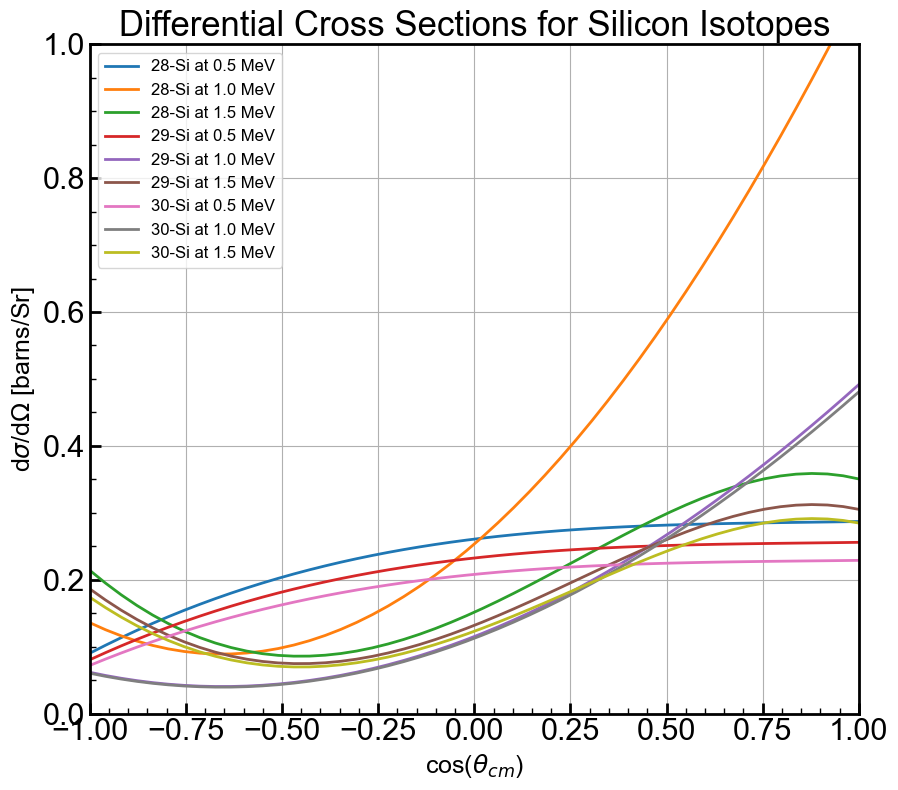

&nbsp;

&nbsp;



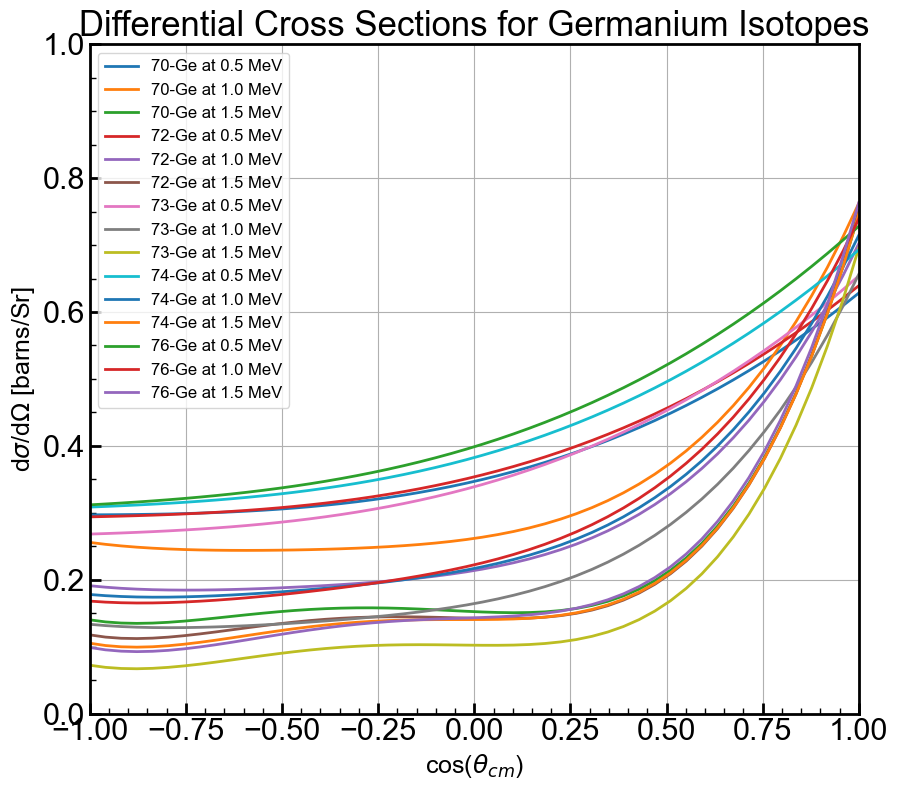

In [6]:
# Cosine theta range
ct = np.linspace(-1.0, 1.0, 50)

# Plot setup
fig, ax1 = plt.subplots(figsize=(9.0, 8.0))
ax1.set_title("Differential Cross Sections for Silicon Isotopes", fontsize=25)

# Isotope definitions
si_isotopes = {
    "28-Si": (f_28, acoeff_28),
    "29-Si": (f_29, acoeff_29),
    "30-Si": (f_30, acoeff_30),
}

# Evaluate and plot differential cross sections for 0.5, 1.0, 1.5 MeV
energies = [0.5e6, 1.0e6, 1.5e6]

for label, (f_i, a_i) in si_isotopes.items():
    for E in energies:
        diffxn = endfel.fetch_diff_xn(En=E, f=f_i, a=a_i)
        ax1.plot(ct, diffxn(ct), label=f"{label} at {E/1e6:.1f} MeV")

# Plot formatting
ax1.set_xlim(-1, 1)
ax1.set_ylim(0.0, 1.0)
ax1.set_xlabel(r'cos($\theta_{cm}$)', fontsize=18)
ax1.set_ylabel(r'd$\sigma$/d$\Omega$ [barns/Sr]', fontsize=18)
ax1.grid(True)
ax1.legend(loc=2, prop={'size': 12})

for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

#Spacer
from IPython.display import display, Markdown
display(Markdown("&nbsp;\n\n&nbsp;\n\n"))  # Adds vertical space

# Plot differential cross sections for Germanium isotopes
ge_isotopes = {
    "70-Ge": (f_70, acoeff_70),
    "72-Ge": (f_72, acoeff_72),
    "73-Ge": (f_73, acoeff_73),
    "74-Ge": (f_74, acoeff_74),
    "76-Ge": (f_76, acoeff_76),
}

fig, ax2 = plt.subplots(figsize=(9.0, 8.0))
ax2.set_title("Differential Cross Sections for Germanium Isotopes", fontsize=25)

for label, (f_i, a_i) in ge_isotopes.items():
    for E in energies:  # reuse [0.5e6, 1.0e6, 1.5e6]
        diffxn = endfel.fetch_diff_xn(En=E, f=f_i, a=a_i)
        ax2.plot(ct, diffxn(ct), label=f"{label} at {E/1e6:.1f} MeV")

ax2.set_xlim(-1, 1)
ax2.set_ylim(0.0, 1.0)
ax2.set_xlabel(r'cos($\theta_{cm}$)', fontsize=18)
ax2.set_ylabel(r'd$\sigma$/d$\Omega$ [barns/Sr]', fontsize=18)
ax2.grid(True)
ax2.legend(loc=2, prop={'size': 12})

for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

### Plot Interpretations

The differential elastic cross sections for both silicon and germanium isotopes generally exhibit a strong forward-peaking behavior, where neutrons are more likely to scatter at small angles relative to their incoming direction. This effect becomes more pronounced as the incident neutron energy increases from 0.5 MeV to 1.5 MeV.

For silicon, $^{28}\text{Si}$ shows a notably sharper forward peak at 1.0 MeV compared to $^{29}\text{Si}$ and $^{30}\text{Si}$. The differences between isotopes are subtle at low energies but become more evident at higher energies.

Germanium isotopes exhibit a similar trend, with $^{70}\text{Ge}$, $^{72}\text{Ge}$, $^{73}\text{Ge}$, $^{74}\text{Ge}$, and $^{76}\text{Ge}$ all showing enhanced forward scattering as neutron energy increases. However, variations between isotopes are more pronounced than in Silicon, reflecting the more complex nuclear structure and resonance behavior of germanium.

In both materials, the angular distribution shifts from relatively isotropic at lower neutron energies to strongly anisotropic at higher energies, consistent with elastic scattering dynamics where forward scattering becomes increasingly favored.